# Desafio Codenation - Obter a nota de matemática de um aluno no enem 2016

## Adicionando bibliotecas e dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

## Análise Exploratória

In [3]:
#Verificando os dados do df
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df2.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
print('Quantidade de colunas nos dados de treino ', len(df.columns))
print('Quantidade de colunas nos dados de teste ', len(df2.columns))

Quantidade de colunas nos dados de treino  167
Quantidade de colunas nos dados de teste  47


### Ajustar features do df com o df2

In [6]:
# Observado que o dataframe de treino está com mais features do que o de teste

colunas = df.columns
for i in colunas:
    if i == 'NU_NOTA_MT':
      pass
    elif i in df2.columns:
      pass
    else:
      df.drop(labels= i, axis= 1, inplace= True)

In [7]:
#Verificando quantidades de colunas
print('Quantidade de colunas nos dados de treino ', len(df.columns))
print('Quantidade de colunas nos dados de teste ', len(df2.columns))

Quantidade de colunas nos dados de treino  48
Quantidade de colunas nos dados de teste  47


Os dados de treino está ajustado, única característica há mais é referente as notas de matemática.

### Visualizar Missing Values

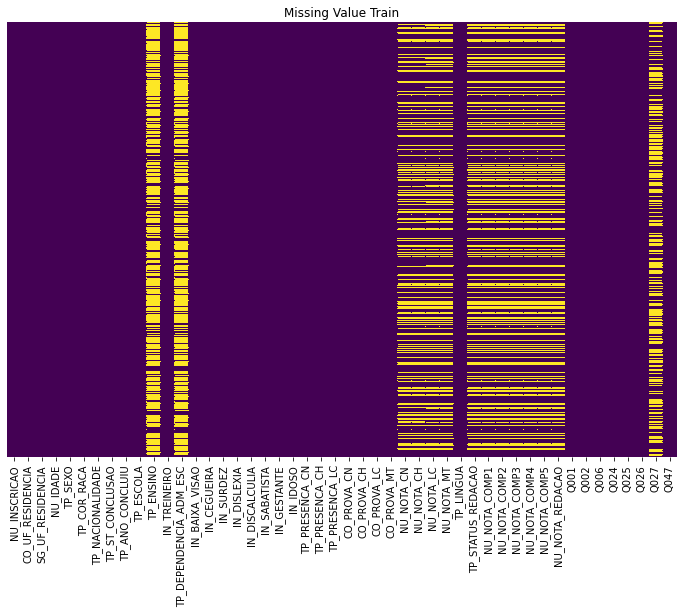

In [8]:
#Visualizando os valores missing
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Train');

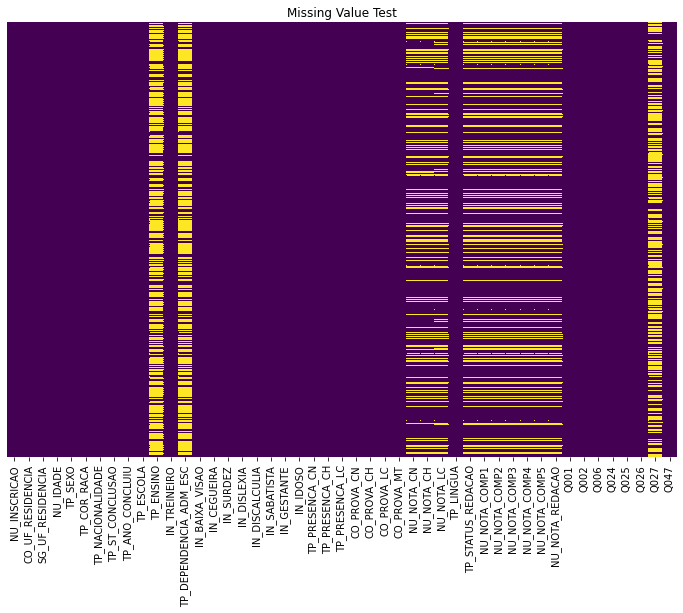

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Test');

### Aplicando nota 0 as alunos que não compareceram ou foram expulsos da prova tanto

In [10]:
#No dicionário consta que 0(faltou) e 2(expulso) partindo desse princípio, se o aluno não veio o objetivo é zerar as notas
df.loc[df['TP_PRESENCA_CN'] == 0, ['NU_NOTA_MT', 'NU_NOTA_CN']] = 0
df.loc[df['TP_PRESENCA_CN'] == 2, ['NU_NOTA_MT', 'NU_NOTA_CN']] = 0
df.loc[df['TP_PRESENCA_CH'] == 0, ['NU_NOTA_LC', 'NU_NOTA_CH']] = 0
df.loc[df['TP_PRESENCA_CH'] == 2, ['NU_NOTA_LC', 'NU_NOTA_CH']] = 0

In [11]:
df2.loc[df2['TP_PRESENCA_CN'] == 0, 'NU_NOTA_CN'] = 0
df2.loc[df2['TP_PRESENCA_CN'] == 2, 'NU_NOTA_CN'] = 0
df2.loc[df2['TP_PRESENCA_CH'] == 0, ['NU_NOTA_LC', 'NU_NOTA_CH']] = 0
df2.loc[df2['TP_PRESENCA_CH'] == 2, ['NU_NOTA_LC', 'NU_NOTA_CH']] = 0

In [12]:
df.loc[df['TP_PRESENCA_LC'] == 0, ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']] = 0
df.loc[df['TP_PRESENCA_LC'] == 2, ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']] = 0

In [13]:
df2.loc[df2['TP_PRESENCA_LC'] == 0, ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']] = 0
df2.loc[df2['TP_PRESENCA_LC'] == 2, ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']] = 0

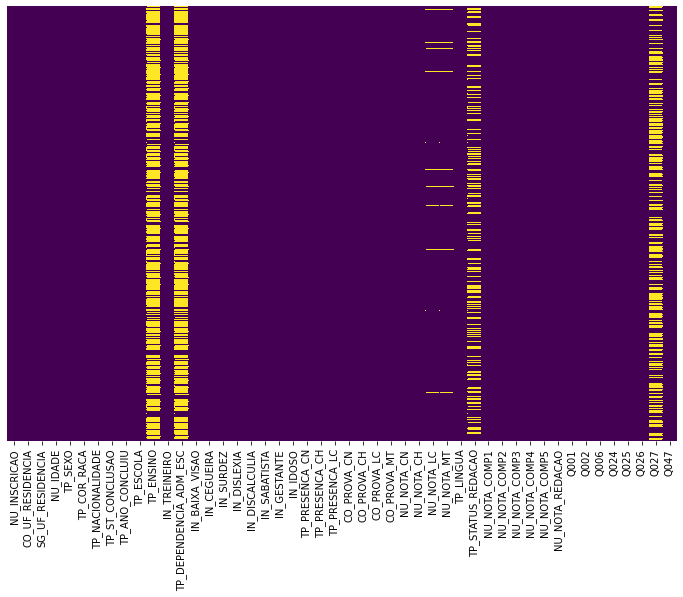

In [14]:
#Observamos aqui que um quantidade houve uma pequena diferença no ajuste dos valores faltantes no df de teste
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

### Verificando e tratamento dos missing values

In [15]:
for i in zip(df.columns, list(df.isnull().sum())):
    print(i)

('NU_INSCRICAO', 0)
('CO_UF_RESIDENCIA', 0)
('SG_UF_RESIDENCIA', 0)
('NU_IDADE', 0)
('TP_SEXO', 0)
('TP_COR_RACA', 0)
('TP_NACIONALIDADE', 0)
('TP_ST_CONCLUSAO', 0)
('TP_ANO_CONCLUIU', 0)
('TP_ESCOLA', 0)
('TP_ENSINO', 9448)
('IN_TREINEIRO', 0)
('TP_DEPENDENCIA_ADM_ESC', 9448)
('IN_BAIXA_VISAO', 0)
('IN_CEGUEIRA', 0)
('IN_SURDEZ', 0)
('IN_DISLEXIA', 0)
('IN_DISCALCULIA', 0)
('IN_SABATISTA', 0)
('IN_GESTANTE', 0)
('IN_IDOSO', 0)
('TP_PRESENCA_CN', 0)
('TP_PRESENCA_CH', 0)
('TP_PRESENCA_LC', 0)
('CO_PROVA_CN', 0)
('CO_PROVA_CH', 0)
('CO_PROVA_LC', 0)
('CO_PROVA_MT', 0)
('NU_NOTA_CN', 0)
('NU_NOTA_CH', 0)
('NU_NOTA_LC', 244)
('NU_NOTA_MT', 244)
('TP_LINGUA', 0)
('TP_STATUS_REDACAO', 3597)
('NU_NOTA_COMP1', 0)
('NU_NOTA_COMP2', 0)
('NU_NOTA_COMP3', 0)
('NU_NOTA_COMP4', 0)
('NU_NOTA_COMP5', 0)
('NU_NOTA_REDACAO', 0)
('Q001', 0)
('Q002', 0)
('Q006', 0)
('Q024', 0)
('Q025', 0)
('Q026', 0)
('Q027', 7373)
('Q047', 0)


In [16]:
#Analisando os dados é observado que algumas colunas o preenchimento por alguma média é inviável
col = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027', 'TP_STATUS_REDACAO']
row = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']

In [17]:
#Removendo colunas
df.drop(labels= col,axis= 1, inplace= True)
df2.drop(labels= col, axis= 1, inplace= True)

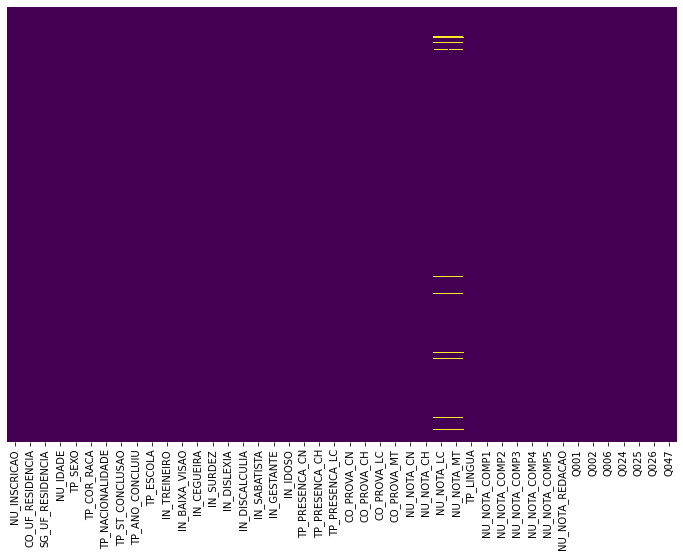

In [18]:
# colunas com missing values df1
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

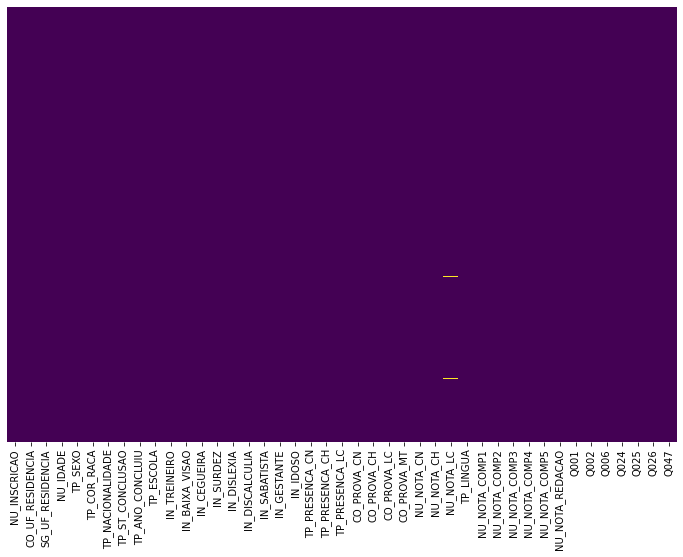

In [19]:
# colunas com missing values df2
plt.figure(figsize=(12,8))
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [20]:
# verificando onde consta os valores nulos
for i in zip(df.columns, list(df.isnull().sum())):
    print(i)

('NU_INSCRICAO', 0)
('CO_UF_RESIDENCIA', 0)
('SG_UF_RESIDENCIA', 0)
('NU_IDADE', 0)
('TP_SEXO', 0)
('TP_COR_RACA', 0)
('TP_NACIONALIDADE', 0)
('TP_ST_CONCLUSAO', 0)
('TP_ANO_CONCLUIU', 0)
('TP_ESCOLA', 0)
('IN_TREINEIRO', 0)
('IN_BAIXA_VISAO', 0)
('IN_CEGUEIRA', 0)
('IN_SURDEZ', 0)
('IN_DISLEXIA', 0)
('IN_DISCALCULIA', 0)
('IN_SABATISTA', 0)
('IN_GESTANTE', 0)
('IN_IDOSO', 0)
('TP_PRESENCA_CN', 0)
('TP_PRESENCA_CH', 0)
('TP_PRESENCA_LC', 0)
('CO_PROVA_CN', 0)
('CO_PROVA_CH', 0)
('CO_PROVA_LC', 0)
('CO_PROVA_MT', 0)
('NU_NOTA_CN', 0)
('NU_NOTA_CH', 0)
('NU_NOTA_LC', 244)
('NU_NOTA_MT', 244)
('TP_LINGUA', 0)
('NU_NOTA_COMP1', 0)
('NU_NOTA_COMP2', 0)
('NU_NOTA_COMP3', 0)
('NU_NOTA_COMP4', 0)
('NU_NOTA_COMP5', 0)
('NU_NOTA_REDACAO', 0)
('Q001', 0)
('Q002', 0)
('Q006', 0)
('Q024', 0)
('Q025', 0)
('Q026', 0)
('Q047', 0)


In [21]:
# Removendo as 244 linhas de valores faltantes
df.dropna(inplace= True)

#### Tratando o df2

In [22]:
#pelo fato de os dados de testes não poderem ser removidos as linhas, preenchendo dados de interesse com a média
df2['NU_NOTA_CN'].fillna(df2['NU_NOTA_CN'].mean(), inplace= True)
df2['NU_NOTA_LC'].fillna(df2['NU_NOTA_LC'].mean(), inplace= True)

In [23]:
df2.isnull().sum()

NU_INSCRICAO        0
CO_UF_RESIDENCIA    0
SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
TP_COR_RACA         0
TP_NACIONALIDADE    0
TP_ST_CONCLUSAO     0
TP_ANO_CONCLUIU     0
TP_ESCOLA           0
IN_TREINEIRO        0
IN_BAIXA_VISAO      0
IN_CEGUEIRA         0
IN_SURDEZ           0
IN_DISLEXIA         0
IN_DISCALCULIA      0
IN_SABATISTA        0
IN_GESTANTE         0
IN_IDOSO            0
TP_PRESENCA_CN      0
TP_PRESENCA_CH      0
TP_PRESENCA_LC      0
CO_PROVA_CN         0
CO_PROVA_CH         0
CO_PROVA_LC         0
CO_PROVA_MT         0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
TP_LINGUA           0
NU_NOTA_COMP1       0
NU_NOTA_COMP2       0
NU_NOTA_COMP3       0
NU_NOTA_COMP4       0
NU_NOTA_COMP5       0
NU_NOTA_REDACAO     0
Q001                0
Q002                0
Q006                0
Q024                0
Q025                0
Q026                0
Q047                0
dtype: int64

### Selecionando apenas features numéricas

In [24]:
df_numeric = df.select_dtypes(['int', 'float'])
df2_numeric = df2.select_dtypes(['int', 'float'])

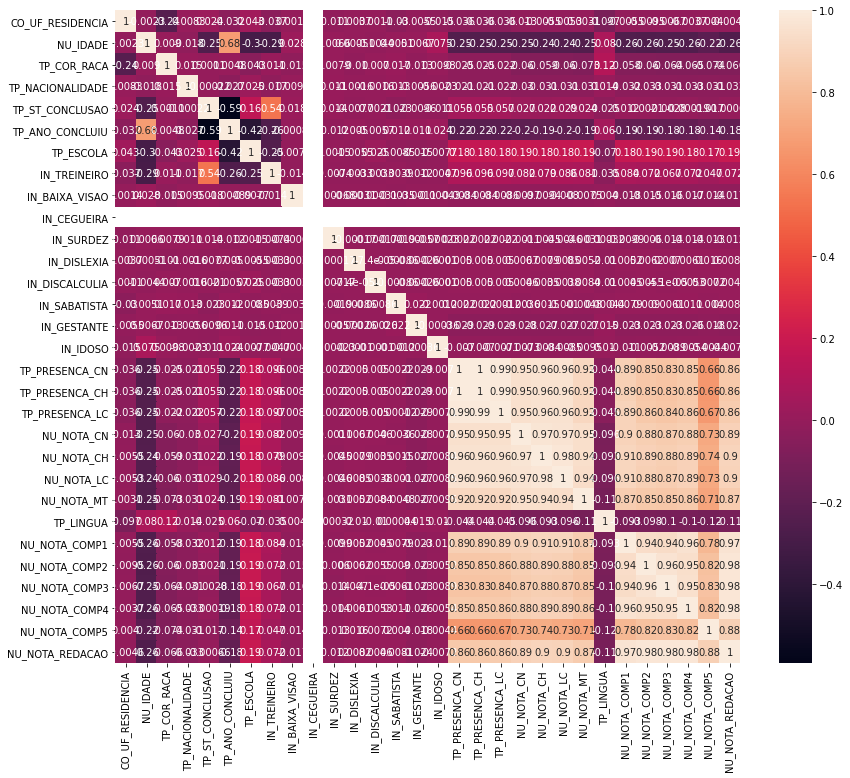

In [25]:
# verificando correlação das features numéricas mais relevantes
plt.figure(figsize=(14,12))
sns.heatmap(data= df_numeric.corr(), annot= True);

In [26]:
cols = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
        'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']
df_numeric = df_numeric[cols]

In [27]:
cols2 = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
        'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']
df2_numeric = df2_numeric[cols2]

## Machine Learning

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [29]:
data = df_numeric.drop(labels= ['NU_NOTA_MT'], axis= 1)
target = df['NU_NOTA_MT']
test = df2_numeric

### Random Forest Regressor com Random Search

In [30]:
param_dist = {
                "bootstrap": [True, False],
                "max_depth": [10, 20, 30, 40, 50, 60, None],
                "max_features": ['auto', 'sqrt'],
                "min_samples_leaf": [1, 2, 4],
                "min_samples_split": [2, 5, 10],
                "n_estimators": [200, 400, 600, 800, 1000]
             }

In [31]:
rfr = RandomForestRegressor()

In [32]:
rand = RandomizedSearchCV(estimator= rfr, param_distributions= param_dist, n_iter= 20, n_jobs= 3, random_state= 42)

In [33]:
rand

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20, n_jobs=3,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42)

In [34]:
#treinando os dados
random_forest = rand.fit(data, target)

In [36]:
print(f'parametros: {random_forest.best_params_}')
print(f'score: {random_forest.best_score_}')

parametros: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
score: 0.9185330494167203


In [37]:
#Score do treino
random_forest.score(data, target)

0.9332492613618801

In [38]:
#Predizendo os dados de treino
data_pred = random_forest.predict(data)

In [39]:
#Analisando as métricas
print('MAE:', metrics.mean_absolute_error(target, data_pred))
print('MSE:', metrics.mean_squared_error(target, data_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(target, data_pred)))

MAE: 40.497345120124045
MSE: 3422.1859373100856
RMSE: 58.4994524530793


In [40]:
#Predizendo o test
result = random_forest.predict(test)
result

array([4.32714424e+02, 4.52016501e+02, 5.81872093e+02, ...,
       6.69864506e+02, 4.54267477e+02, 7.02271541e-04])

In [41]:
#Criando um dataframe que vai ser exportado para csv
answer = pd.DataFrame(data= df2['NU_INSCRICAO'])
answer['NU_NOTA_MT'] = result

In [42]:
answer.to_csv('answer_rand.csv', index= False)

In [43]:
verificad = pd.read_csv('answer.csv')

In [44]:
verificad

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,432.714424
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,452.016501
2,b38a03232f43b11c9d0788abaf060f7366053b6d,581.872093
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000702
4,715494628a50142ce8cb17191cfe6d0f3cae0934,504.402084
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,454.035750
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,477.383566
4573,655fa6306720ff16e825903b5422a46608a77545,669.864506
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,454.267477


Com esta abordagem obtive um score de 92.35%